In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [ ]:
#import some data to play with
company_data = pd.read_csv('Company_Data.csv') 

In [ ]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
# Checking for null values
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# Checking for the information of the data
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
# Checking the correlation
company_data.corr()

<ipython-input-6-5344b0e285d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  company_data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [ ]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
company_data['ShelveLoc']= label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban']= label_encoder.fit_transform(company_data['Urban'])
company_data['US']= label_encoder.fit_transform(company_data['US'])
#Covert Object type to categorical variable
company_data['ShelveLoc']=company_data['ShelveLoc'].astype('category')
company_data['Urban']=company_data['Urban'].astype('category')
company_data['US']=company_data['US'].astype('category')

In [ ]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [ ]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


<ipython-input-10-fc37d86333c5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=company_data.corr(), annot=True)


<Axes: title={'center': 'attributes causes high sale'}>

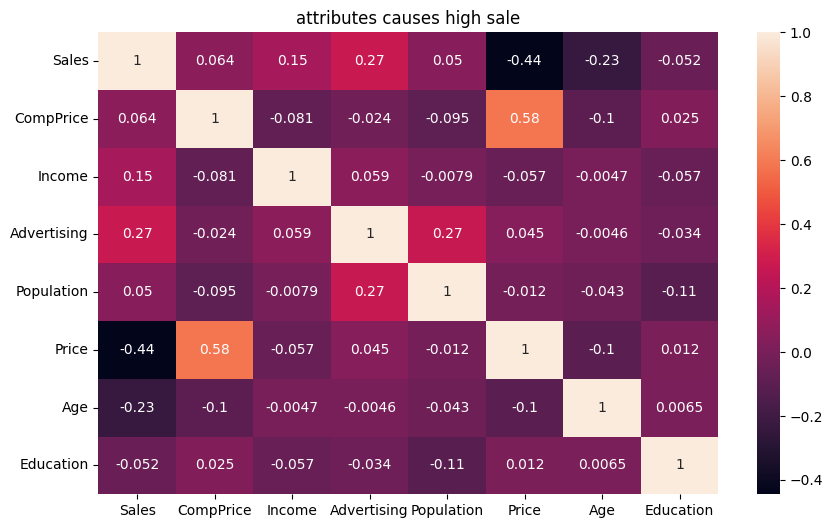

In [ ]:
plt.figure(figsize=(10,6))
plt.title("attributes causes high sale")
sns.heatmap(data=company_data.corr(), annot=True)

In [ ]:
x=company_data.iloc[:,0:6]
y=company_data['ShelveLoc']

In [ ]:
x 
pd.set_option("display.max_rows", None) 

In [ ]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
5,10.81,124,113,13,501,72
6,6.63,115,105,0,45,108
7,11.85,136,81,15,425,120
8,6.54,132,110,0,108,124
9,4.69,132,113,0,131,124


In [ ]:
y 

0      0
1      1
2      2
3      2
4      0
5      0
6      2
7      1
8      2
9      2
10     0
11     1
12     2
13     1
14     1
15     2
16     1
17     1
18     1
19     2
20     2
21     1
22     2
23     2
24     0
25     1
26     1
27     2
28     0
29     0
30     1
31     2
32     1
33     1
34     2
35     2
36     1
37     2
38     2
39     0
40     0
41     0
42     2
43     2
44     2
45     0
46     2
47     0
48     0
49     1
50     0
51     0
52     0
53     2
54     2
55     2
56     2
57     0
58     0
59     2
60     0
61     2
62     0
63     2
64     2
65     2
66     2
67     2
68     1
69     2
70     1
71     2
72     2
73     1
74     2
75     0
76     2
77     2
78     2
79     0
80     0
81     1
82     1
83     0
84     0
85     2
86     2
87     1
88     2
89     2
90     2
91     2
92     2
93     2
94     0
95     2
96     1
97     0
98     1
99     0
100    2
101    2
102    2
103    0
104    2
105    2
106    2
107    2
108    0
109    2
110    2
1

In [ ]:
company_data['ShelveLoc'].unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [ ]:
company_data.ShelveLoc.value_counts() 

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [ ]:
colnames = list(company_data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=44) 

# Decision Tree model

### Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

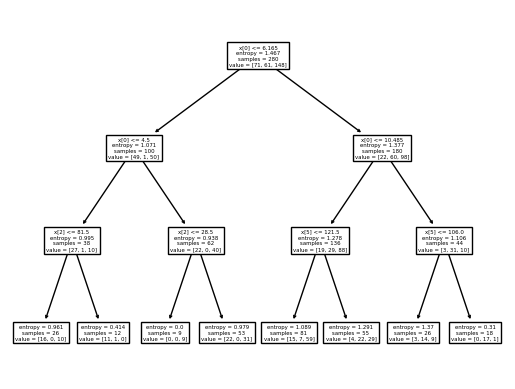

In [ ]:
#Plot the decision tree
tree.plot_tree(model);

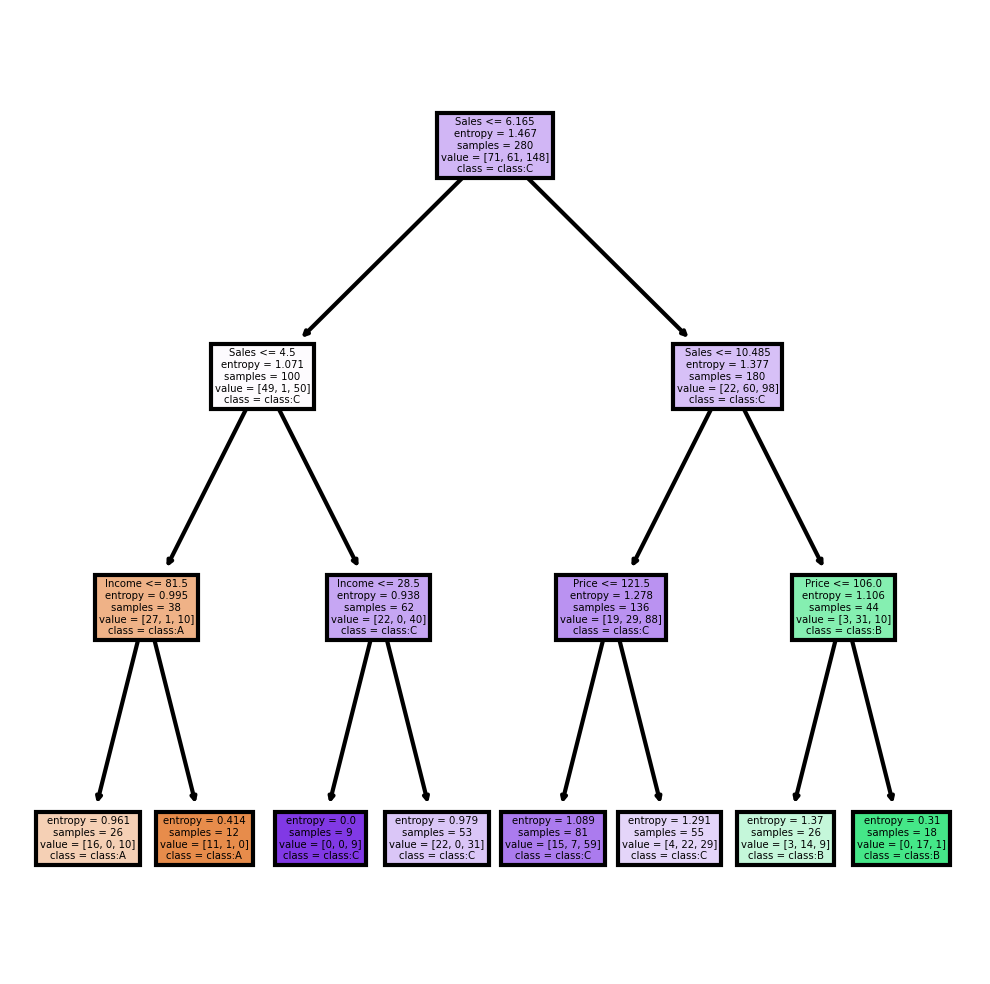

In [ ]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['class:A', 'class:B', 'class:C']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_0 <= 6.16
|   |--- feature_0 <= 4.50
|   |   |--- feature_2 <= 81.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  81.50
|   |   |   |--- class: 0
|   |--- feature_0 >  4.50
|   |   |--- feature_2 <= 28.50
|   |   |   |--- class: 2
|   |   |--- feature_2 >  28.50
|   |   |   |--- class: 2
|--- feature_0 >  6.16
|   |--- feature_0 <= 10.48
|   |   |--- feature_5 <= 121.50
|   |   |   |--- class: 2
|   |   |--- feature_5 >  121.50
|   |   |   |--- class: 2
|   |--- feature_0 >  10.48
|   |   |--- feature_5 <= 106.00
|   |   |   |--- class: 1
|   |   |--- feature_5 >  106.00
|   |   |   |--- class: 1



In [ ]:
model.feature_importances_

array([0.71764974, 0.        , 0.11002609, 0.        , 0.        ,
       0.17232417])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Sales          0.717650
Price          0.172324
Income         0.110026
CompPrice      0.000000
Advertising    0.000000
Population     0.000000
dtype: float64

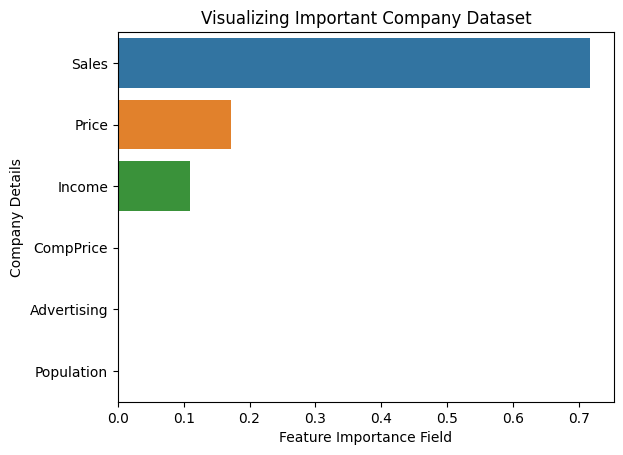

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Field')
plt.ylabel('Company Details')
plt.title("Visualizing Important Company Dataset")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

2    86
1    18
0    16
dtype: int64

In [ ]:
preds 

array([2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 0, 2])

In [ ]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1,2
ShelveLoc,,,
0,7,0,18
1,0,13,11
2,9,5,57


In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.6416666666666667

### Decision Tree Regression Example

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [ ]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.6416666666666667

In [ ]:
model.feature_importances_

array([0.71764974, 0.        , 0.11002609, 0.        , 0.        ,
       0.17232417])

###Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [ ]:
array = company_data.values
X = array[:,1:6] 
y = array[:,0] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)  

DecisionTreeRegressor(max_depth=3)

In [ ]:
#Find the testing accuracy
model.score(X_test,y_test)

0.09126516756089775